Shape of the dataset: (13200, 7)
Columns of the dataset: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  

Basic Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.32344

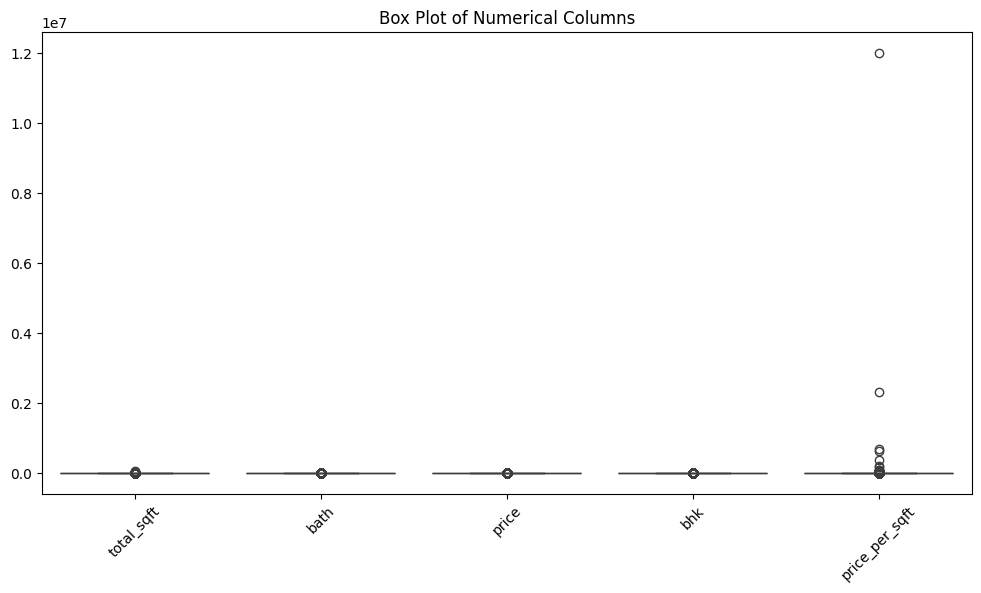

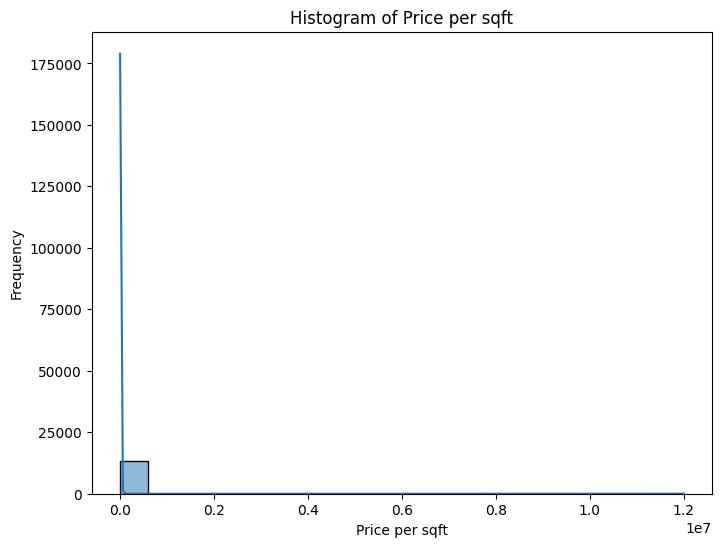

ValueError: could not convert string to float: 'Electronic City Phase II'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zscore

# Load the data
df = pd.read_csv(r"C:\Users\theer\Downloads\house_price.csv")

df

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("Columns of the dataset:", df.columns)

# Display the first few rows of the dataset
print(df.head())

# EDA - Exploratory Data Analysis

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Box plot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Histogram for price per sqft column
plt.figure(figsize=(8, 6))
sns.histplot(df["price_per_sqft"], bins=20, kde=True)
plt.title("Histogram of Price per sqft")
plt.xlabel("Price per sqft")
plt.ylabel("Frequency")
plt.show()

# Correlation between numerical columns and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots between variables
sns.pairplot(df)
plt.title("Pairplot of Numerical Columns")
plt.show()

# Outlier Detection and Removal

# Detect outliers and remove them using different methods

# Mean function
mean_price_per_sqft = df["price_per_sqft"].mean()
std_dev_price_per_sqft = df["price_per_sqft"].std()
lower_bound_mean = mean_price_per_sqft - 3 * std_dev_price_per_sqft
upper_bound_mean = mean_price_per_sqft + 3 * std_dev_price_per_sqft
df_mean = df[(df["price_per_sqft"] >= lower_bound_mean) & (df["price_per_sqft"] <= upper_bound_mean)]

# Percentile method
lower_percentile = df["price_per_sqft"].quantile(0.05)
upper_percentile = df["price_per_sqft"].quantile(0.95)
df_percentile = df[(df["price_per_sqft"] >= lower_percentile) & (df["price_per_sqft"] <= upper_percentile)]

# IQR (Interquartile Range) method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
df_iqr = df[(df["price_per_sqft"] >= lower_bound_iqr) & (df["price_per_sqft"] <= upper_bound_iqr)]

# Normal distribution
mu, sigma = norm.fit(df["price_per_sqft"])
lower_bound_normal = mu - 3 * sigma
upper_bound_normal = mu + 3 * sigma
df_normal = df[(df["price_per_sqft"] >= lower_bound_normal) & (df["price_per_sqft"] <= upper_bound_normal)]

# Z-score method
threshold = 3
z_scores = np.abs(zscore(df["price_per_sqft"]))
df_zscore = df[z_scores < threshold]

# Display the shape of filtered datasets after outlier removal
print("\nShape of filtered dataset (Mean function):", df_mean.shape)
print("Shape of filtered dataset (Percentile method):", df_percentile.shape)
print("Shape of filtered dataset (IQR method):", df_iqr.shape)
print("Shape of filtered dataset (Normal distribution method):", df_normal.shape)
print("Shape of filtered dataset (Z-score method):", df_zscore.shape)
